Github link: https://github.com/koutensei/cs598_team69

Video link: https://drive.google.com/file/d/1Tk_DScRyy7Hsy3WkNswCoYiOEMgSxK1Q/view?usp=sharing

## 1. Introduction

The application of machine learning in the medical field is increasingly popular due to its potential to save manpower, enhance overall efficiency, and ultimately save more lives [1]. However, the lack of high-quality datasets poses a significant challenge for large-scale implementation. The expense of labeling medical images manually and the shortage of experts capable of doing so act as natural barriers, hindering the realization of the benefits of machine learning [2]. While there's widespread recognition of the value of automated medical image recognition and categorization, previous methods often fail to provide accurate and timely results [3]. With the emergence of pre-trained Vision Language Models (VLM) like GLIP-T, scientists can now recognize everyday objects with remarkable accuracy by providing prompts, but there's limited evidence to demonstrate the effectiveness of such technologies in the medical imaging domain [4, 5]. Therefore, transfer learning, a strategy utilized to train deep neural networks for domains with limited labeled data, was proposed to bridge this gap by many scholars [6, 7].

Despite many studies applying transfer learning to domains with limited labeled data, there is little to no focus on whether transfer learning can be applied to medical images with VLMs [8]. Therefore, the authors innovatively proposed a study to address this gap by first demonstrating the importance of well-designed medical prompts in VLMs for medical image recognition. Secondly, to save manpower, they also provided three methods to auto-generate medical prompts. Lastly, they conducted experiments on thirteen medical datasets to examine their conclusions. The result of those experiments proved their believes - by using well designed medical prompts, the result of transfer learning will surpass traditional supervised method (In full data, on average, the highest AP% for supervised models is 51.8% compared with 57.9% for the authors' method.). Besides that, they also prove that well designed medical prompts will brings more accurate image prediction compared with the default prompts provided by GLIP-T which only contains object names. Considering the cost in nature for human experts to write medical prompts, the authors provide ways to auto-genrate medical prompts, which after compared with the mannual designed prompts, have little disadvantages in AP%. In conclusion, after conducting this study, the authors demonstrated that well-designed medical prompts are crucial for successful transfer learning in medical image recognition with VLMs and building on this finding, they offer methods to automatically generate medical prompts that exhibit minimal differences compared to expert manually written prompts.

### 1.1 One Paragraph Paper Summary
This paper we choose, Medical Image Understanding with Pretrained Vision Language Models: A Comprehensive Study (https://arxiv.org/abs/2209.15517v2) explores the transfer of knowledge from pre-trained vision language models (VLMs) like GLIP and OFA to the medical domain [8]. By using the MLM-driven auto-prompt generation approach, researchers successfully generated auto-prompts supported by expert-level knowledge. However, to enhance model flexibility, they proposed an image-specific auto-prompt generation method using pre-trained visual question answering (VQA) models like OFA, to include image-specific attribute information. The GLIP model further improves performance in domain transfer by introducing prompts with expressive attributes, highlighting the crucial role of prompt learning in enhancing model generalization capabilities.

<img src="figures/framework.PNG">

## 2. Scope of Reproducibility:

1. Whether well-designed medical prompts improve the zero-shot, few-shot, and fine-tuning performance of pre-trained Vision Language Models (VLMs) on medical datasets.

2. Whether expressive attributes shared between domains (natural and medical) into prompts significantly enhances knowledge transfer from VLMs to the medical image domain.

3. Whether expert-level medical knowledge and image-specific information embedded in prompts enable the model to recognize novel objects in medical images with minimal or no additional training samples.

## 3. Methodology

### 3.1 Set up Environment

This notebook is optimized at following environment.

Please run the following command in the terminal of the corresponding virtual environment.
A few modifications have been made to resolve the conflicts of the original requirement file of the MIU-VL repo:

we loose the requirements for:

mkl-fft 1.3.1 -> mkl-fft
torchaudio==0.9.0a0+a85b239 -> torchaudio

as they will cause conflicts

specify version for:

numpy -> numpy=1.23

as numpy version >=1.24 dosen't have np.float, which conflicts with other dependencies.

and delete:
pycocotools==2.0.4
as it cannot be installed properly in an anaconda environment.
Instead, we use the conda install command as shown in the following block.

In [ ]:
#please run in terminal
'''
!pip install -r requirements.txt
conda install -c conda-forge pycocotools
'''


'\n!pip install -r requirements.txt\nconda install -c conda-forge pycocotools\n'

### 3.2 About Data 
The author of MIU-VL only provides a subset of their data, the polyp dataset.

They provide two download links: BaiduNetDisk and Google Drive. The first one is not valid and the data contained in the Google Drive link is incomplete, with mask images for the train data, and all images for the val data missing.
Luckily, the dataset is adapted from another project called  [PraNet](https://github.com/DengPingFan/PraNet) and we are able to find the missing images there.

It is worth mention that the val folder in MIU-VL actually is the same as the the test data folder in PraNet.

In [1]:
import os

def print_folder_structure(start_path, indent=0):

    print("| " * indent + "---" + os.path.basename(start_path) + "/")

    items = os.listdir(start_path)
    subfolders = [item for item in items if os.path.isdir(os.path.join(start_path, item))]

    for folder in subfolders:
        folder_path = os.path.join(start_path, folder)
        print_folder_structure(folder_path, indent + 1)

folder_path = "DATA"

print_folder_structure(folder_path)



---DATA/
| ---POLYP/
| | ---annotations/
| | | ---.ipynb_checkpoints/
| | ---TrainDataset/
| | | ---image/
| | | ---masks/
| | ---val/
| | | ---ETIS-LaribPolypDB/
| | | | ---images/
| | | | ---show/
| | | | ---masks/
| | | ---Kvasir/
| | | | ---images/
| | | | ---show/
| | | | ---masks/
| | | ---CVC-ClinicDB/
| | | | ---images/
| | | | ---show/
| | | | ---masks/
| | | ---CVC-300/
| | | | ---images/
| | | | ---show/
| | | | ---masks/
| | | ---CVC-ColonDB/
| | | | ---images/
| | | | ---show/
| | | | ---masks/
| | ---train/
| | | ---.ipynb_checkpoints/
| | | ---images/
| | | | ---.ipynb_checkpoints/
| | | ---show/
| | | ---masks/
| | | | ---.ipynb_checkpoints/


### sample image

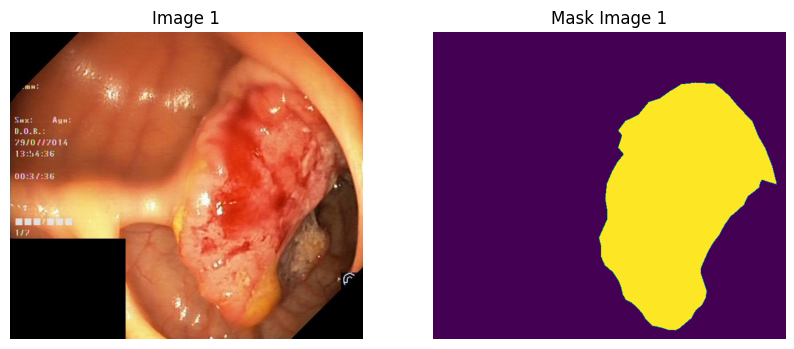

In [2]:
from IPython.display import Image, display
import matplotlib.pyplot as plt

image_path = "DATA/POLYP/val/Kvasir/images/cju0u82z3cuma0835wlxrnrjv.png"
mask_path = "DATA/POLYP/val/Kvasir/masks/cju0u82z3cuma0835wlxrnrjv.png"

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(plt.imread(image_path))
axes[0].set_title('Image 1')

axes[1].imshow(plt.imread(mask_path))
axes[1].set_title('Mask Image 1')

for ax in axes:
    ax.axis('off')

plt.show()



### COCO Annotations for the above image

In [3]:
import json

with open('DATA/POLYP/annotations/Kvasir_val.json', 'r') as f:

    data = json.load(f)


for image in data['images']:
    if image['file_name']=='cju0u82z3cuma0835wlxrnrjv.png':
        print(image)
        img_id=image['id']
for annotation in data['annotations']:
    if annotation['image_id']==img_id:
        print(annotation)


{'file_name': 'cju0u82z3cuma0835wlxrnrjv.png', 'id': 52, 'width': 626, 'height': 546}
{'area': 138600.0, 'bbox': [294.0, 91.0, 315.0, 440.0], 'category_id': 1, 'id': 68, 'image_id': 52, 'iscrowd': 0, 'segmentation': [[294.0, 91.0, 609.0, 91.0, 609.0, 531.0, 294.0, 531.0]]}


### 3.3 Model

### GLIP 

Grounded Language-Image Pre-training (GLIP) is a novel model that unifies object detection and phrase grounding for pre-training [8, 9]. By leveraging massive image-text pairs in a self-training fashion, GLIP can accurately generate grounding boxes even with noisy image-text pairs. The model demonstrates impressive transferability to various object-level recognition tasks, outperforming supervised baselines in zero-shot and few-shot scenarios. Through detailed analysis and visualizations, GLIP showcases its ability to learn semantic-rich representations and improve performance across different datasets.

<img src="figures/caption_prompt.png" alt="caption_prompt">

<img src="figures/image.png" alt="image">

In [5]:
#install GLIP locally
'''!git lfs clone https://github.com/microsoft/GLIP.git'''

'!git lfs clone https://github.com/microsoft/GLIP.git'

In [6]:
'''!pip install einops shapely timm yacs tensorboardX ftfy prettytable pymongo
!pip install transformers

import shutil
source_folder = 'DATA/POLYP'
destination_folder = 'GLIP/DATASET/odinw/POLYP'
shutil.copytree(source_folder, destination_folder)'''

"!pip install einops shapely timm yacs tensorboardX ftfy prettytable pymongo\n!pip install transformers\n\nimport shutil\nsource_folder = 'DATA/POLYP'\ndestination_folder = 'GLIP/DATASET/odinw/POLYP'\nshutil.copytree(source_folder, destination_folder)"

### 3.4 Training

### Finetuning Hyperparameters

#### TUNING_HIGHLEVEL_OVERRIDE
SOLVER.TUNING_HIGHLEVEL_OVERRIDE decides the way of tuning. "full" means full-model tuning while "language_prompt_vx" means prompt tuning.
The authors provide 4 kinds of prompt tuning ways for the hyperparameter SOLVER.TUNING_HIGHLEVEL_OVERRIDE.
- v1 (Bert Tuning):
    - Tuning the whole language model (BERT) during prompt tuning.
    - Easier to optimize compared to v2.
    - Similar hyperparameters to fine-tuning can be used.
    - SOLVER.LANG_LR is typically set between 1e-5 to 5e-5.
- v2 (Literal Prompt Tuning):
    - Freezes both the language model and the rest of the model except for a bias embedding vector.
    - Only optimizes the bias vector.
    - Requires hyperparameter search, often with larger learning rates and weight decay.
    - Learning rate tuning with respect to batch size is recommended.
- v3 (Bert Tuning + Unfreezing Linear Layers):
    - Builds on v1 by unfreezing a few more linear layers (e.g., the centerness branch).
    - Includes tuning the whole language model (BERT) during prompt tuning like v1.
- v4 (Literal Prompt Tuning + Unfreezing Linear Layers):
    - Builds on v2 by unfreezing a few more linear layers.
    - Freezes both the language model and the rest of the model except for a bias embedding vector, similar to v2.

The authors mention, that v1 and v2 are the primary methods, with v1 being a more straightforward approach while v2 is more literal, focusing on optimizing bias vectors [8]. 

We first tried the v2, but the model is difficult to convert in our case. According to the author, "If v2 does not work for you out of the box, we recommend trying v1 first and tune v2; conceptually, v1 and v2 should have similar performance if the hyper-parameters of v2 are tuned right.", we switched to v1 instead, but we still can not reach good performance through prompt tunning.
The authors also say "For some datasets that are very different from the pre-training dataset, we do find that prompt tuning could underperform full-tuning", considering the finetune dataset is a very specific dataset contains only one uncommon class while the pretraining dataset is of much more variety, we decided to use full-tuning instead.

#### CAPTION_PROMPT

When trying prompt tuning, we set a custom CAPTION_PROMPT.

In  GLIP, the CAPATAIN_PROMPT is optional and simply the names of all classes. The advantage of using it is that different datasets can be used together. 

CAPTION_PROMPT can also be represented as a pre-defined string consisting of prefix, name, and suffix. Following is the CAPATAIN_PROMPT we found in the authors' codes.

authors_CAPTION_PROMPT= [{"prefix": "", "name": "pink yellow red color oval bump", "suffix": " in rectum"},]

We use a different CAPTION_PROMPT as we think the variety of the shapes matters too.

our_CAPTION_PROMPT= [ {"prefix": "", "name": "bump of various colors（pink yellow red white) and shapes (oval round triangular)", suffix": " located in rectum"}, ]

#### custom_shot_and_epoch_and_general_copy

For hyperparameter custom_shot_and_epoch_and_general_copy, the author's recommended settings are "1_200_8", "3_200_4", "5_200_2", "10_200_1".

We use "1_x_8", "5_x_2", "10_x_1". As for the number of epochs, we keeep training the model and apply early stopping, that is, we only stop the training when there are signs of overfitting(For example, the train loss continues to decrease but the val loss does not.)

#### Batch_size

Batch size can be set through the hyperparameter SOLVER.IMS_PER_BATCH. As in practice, for small numbers, the larger the batch size is, the better the performance will be. We set our Batch size as 3 for full-tuning, which is the maximum our device can support.

#### Learning Rate
The learning rate can be set through the hyperparameter SOLVER.BASE_LR.
We use a dynamic learning rate, that is, we adjust the leraning rate through the training process based on the trend of the losses.


### Finetuning Computational Requirements

### GPU
We use an RTX TITAN for running this notebook locally.


In [1]:
!nvidia-smi

Tue May  7 01:47:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.07             Driver Version: 535.161.07   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA TITAN RTX               Off | 00000000:01:00.0 Off |                  N/A |
| 41%   47C    P8              11W / 280W |    203MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Runtime 
Our device runs at 2.43s/iter for prompt-tuning and 1.5s/iter for full-tuning. 
As mentioned, we keep training the model and apply early stopping. Therefore there are no fixed epochs for each finetuning process. 


### GPU hrs used
Finetuning a model in our conditions can take from an hour to a few hours. With the time we spent exploring hyperparameters, our total GPU hours are 30+ hours.


### Finetuning Codes


In [ ]:
import sys
from GLIP.tools.finetune import main

import os
os.chdir('GLIP')

config_file='/home/tianzhengg/MIU-VL/configs/glip_Swin_T_O365_GoldG.yaml'
task_config='/home/tianzhengg/MIU-VL/configs/polyp.yaml' #finetune configs

custom_shot_and_epoch_and_general_copy="10_500_1"
pretrained_model='/home/tianzhengg/MIU-VL/MODEL/glip_tiny_model_o365_goldg.pth'
cmodel='OUTPUT/ft_task_1/model_0001660.pth'

args = [
    "--config-file", config_file,
    "--ft-tasks", task_config,
    "--skip-test",
    "--custom_shot_and_epoch_and_general_copy", custom_shot_and_epoch_and_general_copy,
    "--evaluate_only_best_on_test",
    "--push_both_val_and_test",
    "MODEL.WEIGHT", pretrained_model,
    "SOLVER.IMS_PER_BATCH", '3',
    #"SOLVER.CHECKPOINT_PERIOD", '10',
    #"SOLVER.BASE_LR","3e-4",
 
    ]
old_sys_argv = sys.argv

sys.argv = [''] + args

main()

sys.argv = old_sys_argv
os.chdir('/home/tianzhengg/MIU-VL')


/home/tianzhengg/miniconda3/envs/cs598/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
When using more than one image per GPU you may encounter an out-of-memory (OOM) error if your GPU does not have sufficient memory. If this happens, you can reduce SOLVER.IMS_PER_BATCH (for training) or TEST.IMS_PER_BATCH (for inference). For training, you must also adjust the learning rate and schedule length according to the linear scaling rule. See for example: https://github.com/facebookresearch/Detectron/blob/master/configs/getting_started/tutorial_1gpu_e2e_faster_rcnn_R-50-FPN.yaml#L14


AUGMENT:
  BRIGHTNESS: 0.0
  CONTRAST: 0.0
  CROP_MIN_IOUS: (0.1, 0.3, 0.5, 0.7, 0.9)
  CROP_MIN_SIZE: 0.3
  CROP_PROB: 0.5
  FLIP_PROB_TRAIN: 0.5
  HUE: 0.0
  MULT_MIN_SIZE_TRAIN: (480, 560, 640, 720, 800)
  SATURATION: 0.0
  USE_RA: 0
  VERTICAL_FLIP_PROB_TRAIN: 0.0
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  DISTRIBUTE_CHUNK_AMONG_NODE: False
  MIN_KPS_PER_IMS: 0
  NUM_WORKERS: 4
  SIZE_DIVISIBILITY: 32
  USE_RANDOM_SEED: False
DATASETS:
  ADD_DET_PROMPT: False
  ADD_DET_PROMPT_ADVANCED: False
  ALTERNATIVE_TRAINING: False
  BING_INDEX_LIST: []
  BOX_THRESHOLD: 0.1
  CAPTION_CONF: 0.9
  CAPTION_FORMAT_VERSION: v1
  CAPTION_MIN_BOX: 1
  CAPTION_NMS: 0.9
  CAPTION_PROMPT: None
  CLASS_AGNOSTIC: False
  CLASS_CONCAT: False
  COCO_COPY: 1
  CONTROL_PROB: (0.0, 0.0, 0.5, 0.0)
  DISABLE_CLIP_TO_IMAGE: False
  DISABLE_SHUFFLE: False
  DIVER_BOX_FOR_VQA: False
  FEW_SHOT: 0
  FLICKR_COPY: 1
  FLICKR_GT_TYPE: separate
  FULL_QUESTION_PROB: 0.5
  FURTHER_SCREEN: False
  GENERAL_COPY: -1
  GEN

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
Setting weight decay of backbone.body.patch_embed.norm.weight to 0.0001
Setting weight decay of backbone.body.patch_embed.norm.bias to 0.0
Setting weight decay of backbone.body.layers.0.blocks.0.norm1.weight to 0.0001
Setting weight decay of backbone.body.layers.0.blocks.0.norm1.bias to 0.0
Setting weight decay of backbone.body.layers.0.blocks.0.norm2.weight to 0.0001
Setting weight decay of backbone.body.layers.0.blocks.0.norm2.bias to 0.0
Setting weight decay of backbone.body.layers.0.blocks.1.norm1.weight to 0.0001
Setting weight decay of backbone.body.layers.0.blocks.1.norm1.bias to 0.0
Setting weight decay of backbone.body.layers.0.blocks.1.norm2.weight to 0.0001
Setting weight decay of backbone.body.layers.0.blocks.1.norm2.bias to 0.0
Setting weight decay of backbone.body.layers.0.downsample.norm.weight to 0.

/home/tianzhengg/miniconda3/envs/cs598/lib/python3.8/site-packages/torch/nn/functional.py:3825: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")


eta: -1 day, 23:50:03  iter: 2060  loss: 0.5889 (0.5913)  loss_reg: 0.0152 (0.0181)  loss_centerness: 0.5719 (0.5730)  loss_cls: 0.0000 (0.0000)  loss_dot_product_token: 0.0002 (0.0003)  time: 1.5904 (1.5155)  data: 0.0082 (0.0350)  lr: 0.000001  wd: 0.000100  max mem: 18833
eta: -1 day, 23:49:17  iter: 2080  loss: 0.5929 (0.5930)  loss_reg: 0.0160 (0.0173)  loss_centerness: 0.5765 (0.5755)  loss_cls: 0.0000 (0.0000)  loss_dot_product_token: 0.0001 (0.0002)  time: 1.4540 (1.5554)  data: 0.0085 (0.0917)  lr: 0.000001  wd: 0.000100  max mem: 18833
eta: -1 day, 23:48:28  iter: 2100  loss: 0.5920 (0.5935)  loss_reg: 0.0150 (0.0170)  loss_centerness: 0.5720 (0.5763)  loss_cls: 0.0000 (0.0000)  loss_dot_product_token: 0.0001 (0.0003)  time: 1.6068 (1.5964)  data: 0.0084 (0.1099)  lr: 0.000001  wd: 0.000100  max mem: 20022
eta: -1 day, 23:47:57  iter: 2120  loss: 0.5871 (0.5923)  loss_reg: 0.0153 (0.0167)  loss_centerness: 0.5734 (0.5754)  loss_cls: 0.0000 (0.0000)  loss_dot_product_token: 0.

### Finetuned Models


In [2]:
one_shot_best_model_checkpoint="GLIP/MODEL/1_shot_model_0000640.pth"
five_shot_best_model_checkpoint="GLIP/MODEL/5_shots_model_0001600.pth"
ten_shot_best_model_checkpoint="GLIP/MODEL/10_shots_model_0002040.pth"


### 3.4.2 Train part 2: Auto-Prompts

### Generate prompts for better performance

As shown in the picture below, given an expressive prompt (“flat and round”), zero-shot performance will be improved.

<img src="figures/prompt.png">


The authors proposed three different methods to automatically generate prompts with expressive attributes, namely masked language model(MLM), [OFA] (https://github.com/OFA-Sys/OFA) model and manual writing.

In [ ]:
#install the required models
'''!git lfs clone https://huggingface.co/microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext
!git lfs clone --single-branch --branch feature/add_transformers https://github.com/OFA-Sys/OFA.git
!pip install OFA/transformers/
!git lfs clone https://huggingface.co/OFA-Sys/OFA-base
os.rename("OFA-base", "ofa-base")'''

### MLM approach
 The first approach is the MLM method. To generate prompts with this approach, the authors used the BiomedNLP-PubmedBERT-base model as their specialized language model. 

In [2]:
# MLM approch
%run make_autopromptsv2.py --dataset 'kvasir' \
      --cls_names 'polyp' \
      --vqa_names 'bump'\
      --mode 'lama'\
      --real_cls_names 'bump'

/home/tianzhengg/miniconda3/envs/cs598/lib/python3.8/site-packages/torchvision/transforms/transforms.py:280: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
Some weights of the model checkpoint at ./BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


  0%|                                                   | 0/100 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

 69%|████████████████████████████▎            | 69/100 [00:00<00:00, 156.35it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 120.95it/s]


### Example of prompts generated using MLM

In [3]:
image_path='DATA/POLYP/val/Kvasir/images/cju0u82z3cuma0835wlxrnrjv.png'
prompt_path="autoprompt_json/lama_kvasir_path_prompt_top1.json"
with open(prompt_path, 'r') as f:

    prompts = json.load(f)

print(prompts[image_path])


{'caption': 'yellow color, oval shape bump in rectum', 'prefix': ['yellow color, oval shape '], 'suffix': [' in rectum'], 'name': ['bump']}


### OFA model approach
The second approach is to use the OFA model for Visual-question answering tasks, and thus OFA module nees to be installed with huggingface transformers. 

In [3]:
#Generate image-specific prompts with VQA and Hybrid method
%run make_autopromptsv2.py --dataset 'kvasir' \
      --cls_names 'polyp' \
      --vqa_names 'bump'\
      --mode 'hybrid'\
      --real_cls_names 'bump'

Some weights of the model checkpoint at ./BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


ofa-base/
<super: <class 'OFATokenizer'>, <OFATokenizer object>>
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


  0%|                                                   | 0/100 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

100%|█████████████████████████████████████████| 100/100 [03:00<00:00,  1.84s/it]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


100%|█████████████████████████████████████████| 100/100 [03:00<00:00,  1.81s/it]


### Example of prompts generated using OFA

In [4]:
image_path='DATA/POLYP/val/Kvasir/images/cju0u82z3cuma0835wlxrnrjv.png'
prompt_path="autoprompt_json/hybrid_kvasir_path_prompt_top1.json"
with open(prompt_path, 'r') as f:

    prompts = json.load(f)

print(prompts[image_path])


{'caption': 'pink triangle bump in some cells', 'prefix': ['pink triangle '], 'suffix': [' in some cells'], 'name': ['bump'], 'color': 'pink', 'shape': 'triangle', 'cls': 'bump'}


### class name as prompt
Besides the two prompts set genereted above, we make a cls_name file where the text is "bump" for every image by runing following code:


In [ ]:
import json

with open('autoprompt_json/lama_kvasir_path_prompt_top1.json', 'r') as file:
    data = json.load(file)

for key, value in data.items():
    value['caption'] = "bump"
    value['name'] = ["bump"]
    value['prefix'] = [""]
    value['suffix'] = [""]
    data[key] = value

with open('autoprompt_json/cls_name.json', 'w') as file:
    json.dump(data, file, indent=4)

## 3.5 Evaluation

### Final Inference

Next, we evaluate the performance of our finetuned models and compare it with the pretrained model on the kvasir data set under the DATA/val folder.



### 3.5.1 The Metrics Description

<img src="figures\Metrics.png">

The authors use the AP% as the evaluation metrics. By comparing The AP% for their model and classical detection models, they made a conclusion that their model is better than others in the AP%.

### 3.5.2 The Evaluation Code

In [1]:
pretrained_model='/home/tianzhengg/MIU-VL/MODEL/glip_tiny_model_o365_goldg.pth'
one_shot_best_model_checkpoint="MODEL/1_shot_model_0000640.pth"
five_shot_best_model_checkpoint="MODEL/5_shots_model_0001600.pth"
ten_shot_best_model_checkpoint="MODEL/10_shots_model_0002040.pth"

config_file="configs/glip_Swin_T_O365_GoldG.yaml" 
odinw_configs="configs/glip_Swin_T_O365_GoldG_polyp_kvasir.yaml" 
output_dir="output/kvasir/"

cls_name="autoprompt_json/cls_name.json"
hybrid="autoprompt_json/hybrid_kvasir_path_prompt_top1.json" #choose the prompts for inference
lama="autoprompt_json/lama_kvasir_path_prompt_top1.json"
json_file=lama
model_checkpoint=ten_shot_best_model_checkpoint #choose model 
%run test_vqa.py --json {json_file} \
  --config-file {config_file} --weight {model_checkpoint} \
  --task_config {odinw_configs} \
  OUTPUT_DIR {output_dir}\
  TEST.IMS_PER_BATCH 2 SOLVER.IMS_PER_BATCH 2 \
  TEST.EVAL_TASK detection \
  DATASETS.TRAIN_DATASETNAME_SUFFIX _grounding \
  DATALOADER.DISTRIBUTE_CHUNK_AMONG_NODE False \
  DATASETS.USE_OVERRIDE_CATEGORY True \
  DATASETS.USE_CAPTION_PROMPT True

/home/tianzhengg/miniconda3/envs/cs598/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


VISION BACKBONE USE GRADIENT CHECKPOINTING:  False
LANGUAGE BACKBONE USE GRADIENT CHECKPOINTING:  False


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'bert.pooler.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
The combined datasets are: ('val',).
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
val has the 100 data points COCODataset
pink yellow red color oval bump in rectum
All queries ['pink yellow red color oval bump in rectum']


  0%|                                                    | 0/51 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/home/tianzhengg/miniconda3/envs/cs598/lib/python3.8/site-packages/torch/nn/functional.py:3825: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")
100%|███████████████████████████████████████████| 51/51 [00:18<00:00,  3.14it/s]

	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


100%|███████████████████████████████████████████| 51/51 [00:19<00:00,  2.68it/s]

Accumulated results
Loading and preparing results...
DONE (t=0.05s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.568
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.775
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.613
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.345
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.621
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.537
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.693
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.693
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

## 4. Results
In this section, we use <font color='green'>Average Precision@[ IoU=0.50:0.95 | area= all |</font> and <font color='blue'>Average Precision@[ IoU=0.50 | area= all |</font> to do the evaluation, because the authors use this two metrics in their paper as the main metrics.

Below is our result table

<img src="figures/results.png">


It can be seen that average precision is increasing as the number of shots increases. The improvement from 0-shot to 1-shot to 5-shot is more significant, while the improvement from 5-shot to 10-shot is not. We even observe a slight decrease in </font> and <font color='blue'>Average Precision@[ IoU=0.50 | area= all |</font> for 10-shot with cls_name prompts, which could be due to overfitting.

The effect of using prompts is most noticeable on 0-shots and becomes less noticeable as the number of shots increases. It is worth noting that the hybrid method of generating prompts is even counterproductive in the 5-shot case.

This may be due to the fact that the temperature of the hybrid prompt is too high, and its color and shape may have many combinations, so sometimes some rare combinations may confuse the model. In contrast, the prompt generated by MLM is unique to all images, in our case it is “yellow color, oval shape bump in rectum”.

## 5. Discussion

By conducting such an experiment study which contains finetuning of the original model and examination of the auto-generate prompts on selecting dataset, we are able to confirm the authors' result was accurate which means at least for our environment and setting it is reproducible.  

We show that the capabilities of the GLIP model obtained by pre-training on the grounding task can be generalized to other tasks by using few-shots finetune. We also confirm the validity of the authors of MIU-VL's proposal to automate prompts generation for Vision Language Model.

We find it is relatively easy to get started because the author provided partial code for us, but when it goes to the actual implementation it will bring up some issues which makes us hard to expend the experiment scope. As the author claimed, for some datasets that are very different from the pre-training dataset, we do find that prompt tuning could under-perform fine-tuning. 

We would recommend the other researchers to replicate this study by trying different fine-tuning method and apply that into a different dataset. Further more, we encourage people to try different model with auto-generate prompts to see what could happened.


## Citation

[1] Habehh H, Gohel S. Machine Learning in Healthcare. Curr Genomics. 2021 Dec 16;22(4):291-300. doi: 10.2174/1389202922666210705124359. PMID: 35273459; PMCID: PMC8822225.

[2] Xiao, C., Sun, J. (2021). Introduction. In: Introduction to Deep Learning for Healthcare. Springer, Cham. https://doi.org/10.1007/978-3-030-82184-5_1

[3] S. Niu, M. Liu, Y. Liu, J. Wang and H. Song, "Distant Domain Transfer Learning for Medical Imaging," in IEEE Journal of Biomedical and Health Informatics, vol. 25, no. 10, pp. 3784-3793, Oct. 2021, doi: 10.1109/JBHI.2021.3051470.

[4] Li, L. H., Zhang, P., Zhang, H., Yang, J., Li, C., Zhong, Y., Wang, L., Yuan, L., Zhang, L., Hwang, J., Chang, K., & Gao, J. (2021). Grounded Language-Image Pre-training. ArXiv. /abs/2112.03857

[5] Shen, S., Li, C., Hu, X., Yang, J., Xie, Y., Zhang, P., Gan, Z., Wang, L., Yuan, L., Liu, C., Keutzer, K., Darrell, T., Rohrbach, A., & Gao, J. (2022). K-LITE: Learning Transferable Visual Models with External Knowledge. ArXiv. /abs/2204.09222

[6] Peng, L., Liang, H., Luo, G., Li, T., & Sun, J. (2021). Rethinking Transfer Learning for Medical Image Classification. ArXiv. /abs/2106.05152

[7] Zhou Z, Sodha V, Pang J, Gotway MB, Liang J. Models Genesis. Med Image Anal. 2021 Jan;67:101840. doi: 10.1016/j.media.2020.101840. Epub 2020 Oct 13. PMID: 33188996; PMCID: PMC7726094.

[8] Qin, Z., Yi, H., Lao, Q., & Li, K. (2022). Medical Image Understanding with Pretrained Vision Language Models: A Comprehensive Study. ArXiv. /abs/2209.15517

[9] Li, L. H., Zhang, P., Zhang, H., Yang, J., Li, C., Zhong, Y., Wang, L., Yuan, L., Zhang, L., Hwang, J., Chang, K., & Gao, J. (2021). Grounded Language-Image Pre-training. ArXiv. /abs/2112.03857